# KNN Closest Neighbour Model

## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
# training df 
df_train = pd.read_csv('../../data/train/customer_churn_dataset-training-clean.csv')
#test df 
df_test = pd.read_csv('../../data/test/customer_churn_dataset-testing-clean.csv')

## Splitting Train and Test

In [3]:
# training data setting fitting variables and predictor
X_train = df_train[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_train = df_train['churn']

# test data setting fitting variables and predictor
X_test = df_test[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_test = df_test['churn']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353644, 10)
(151562, 10)
(353644,)
(151562,)


In [22]:
print(y_train.value_counts())
print(y_test.value_counts())


churn
1    196344
0    157300
Name: count, dtype: int64
churn
1    84148
0    67414
Name: count, dtype: int64


## Fitting NeuralNetwork

In [4]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [ ]:
model = keras.models.Sequential()

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 1,
                            activation='sigmoid')) #for binary classification



model.compile(
    optimizer = keras.optimizers.Adam(), # more robust optimzer for more complex data:adapts the learning rate during training.
    loss = 'binary_crossentropy', #for binary classification
    metrics = ["accuracy"]
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)

history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_split = 0.1,
    callbacks = [early_stopping_cb]
)

Epoch 1/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - accuracy: 0.7724 - loss: 0.8479 - val_accuracy: 0.8492 - val_loss: 0.3810
Epoch 2/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.8312 - loss: 0.4200 - val_accuracy: 0.8206 - val_loss: 0.4277
Epoch 3/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8472 - loss: 0.3856 - val_accuracy: 0.8814 - val_loss: 0.3332
Epoch 4/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.8703 - loss: 0.3443 - val_accuracy: 0.8718 - val_loss: 0.3360
Epoch 5/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.8874 - loss: 0.3130 - val_accuracy: 0.9015 - val_loss: 0.2902
Epoch 6/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8930 - loss: 0.3013 - val_accuracy: 0.9026 - val_loss: 0.2817
Epoch 7/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.8971 - loss: 0.2912 - val_accuracy: 0.9037 - val_loss: 0.2705
Epoch 8/50
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.8993 -

## (Baseline) Training Metrics

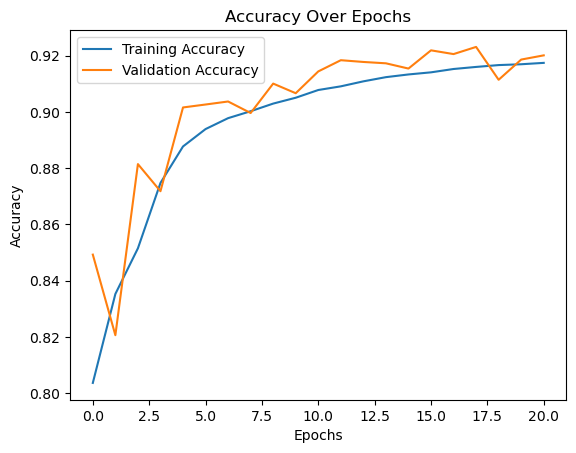

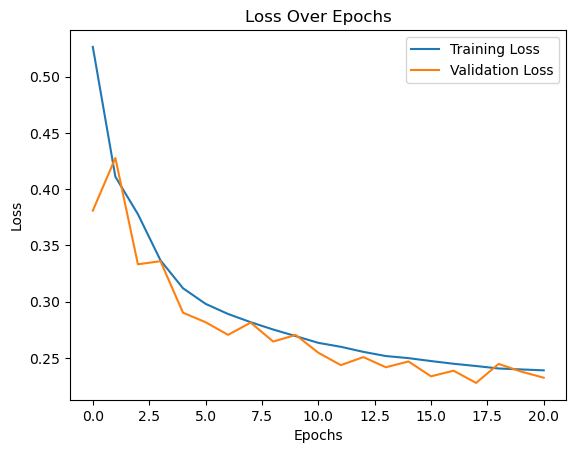

In [24]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Balanced Learning

Training and validation accuracy steadily improve and converge.
Training and validation loss decrease at a similar pace without significant divergence.
**This means that**
The model architecture is appropriate for the problem.
Proper regularization prevents overfitting.
Data preprocessing is adequate, and the dataset is representative.


## (Baseline) Testing Metrics 

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4737/4737 ━━━━━━━━━━━━━━━━━━━━ 2s 338us/step - accuracy: 0.9173 - loss: 0.2377
Test Loss: 0.2390303760766983
Test Accuracy: 0.9167073369026184


4737/4737 ━━━━━━━━━━━━━━━━━━━━ 2s 311us/step


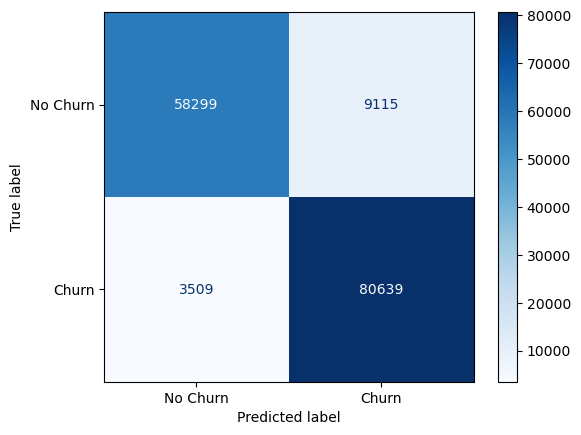

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict probabilities and convert to binary predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))


              precision    recall  f1-score   support

    No Churn       0.94      0.86      0.90     67414
       Churn       0.90      0.96      0.93     84148

    accuracy                           0.92    151562
   macro avg       0.92      0.91      0.91    151562
weighted avg       0.92      0.92      0.92    151562



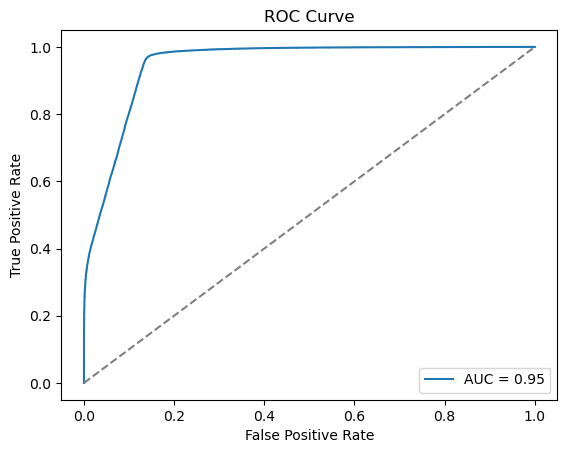

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Save best nueral network model

In [29]:
import h5py

model.save('../../models/trained_model_07_KerasNueralNetworkSequential.h5') 